In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  
NUM_ESTIMATORS = 100
NO_JOBS = 4

VALID_SIZE = 0.20 
TEST_SIZE = 0.20 
#CROSS-VALIDATION
NUMBER_KFOLDS = 5

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 
EARLY_STOP = 50 
OPT_ROUNDS = 1000 
VERBOSE_EVAL = 50 

#IS_LOCAL = False

import os

# PATH="D:\Data's\creditcard.csv"
PATH="E:\ASU\Sem 2\SML\project\creditcard.csv"

In [2]:
data_df = pd.read_csv(PATH)

In [3]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [4]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
temp= data_df['Class'].value_counts()

In [8]:
temp

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
tp=temp.transpose

In [10]:
tp = pd.Series([284315, 492], index=[0, 1], name='count')
tp1 = tp.reset_index()
tp1.columns = ['Class', 'Frequency']
tp1

,Class,Frequency
0,0,284315
1,1,492


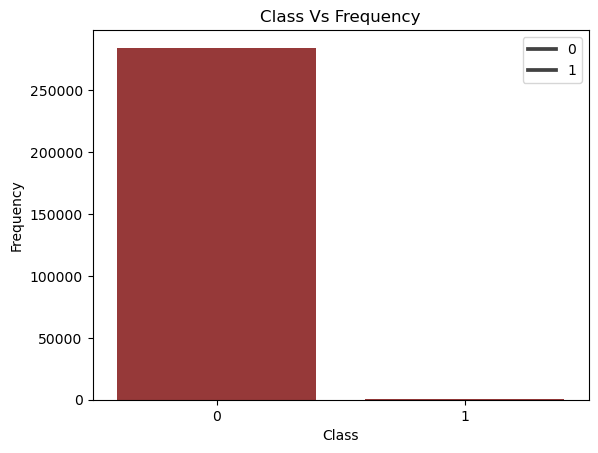

In [11]:
sns.barplot(x=tp1.Class, y= tp1.Frequency, color='brown') 
plt.xlabel('Class')  
plt.ylabel('Frequency')  
plt.title('Class Vs Frequency') 
plt.legend(tp1['Class'])
plt.show() 

In [12]:
tp2=data_df['Class'].value_counts()
tp2

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
df = tp2.to_frame().reset_index()
df.columns = ['Class', 'values']

In [14]:
df

,Class,values
0,0,284315
1,1,492


<Axes: >

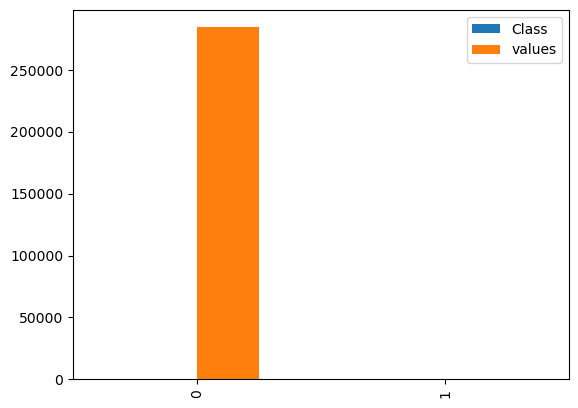

In [15]:
df.plot(kind='bar')


In [16]:
df.Class=df.Class.astype(str)
df['Class'] = df['Class'].replace("0", "Not Fraud")
df['Class'] = df['Class'].replace("1", "Fraud")

In [17]:
df

,Class,values
0,Not Fraud,284315
1,Fraud,492


In [18]:

import cufflinks as cf
cf.go_offline()

df.iplot(kind='bar', x='Class', y='values', title='Class vs No. of Transactions',\
         xTitle='Class', yTitle='No of Transaction',layout_update={'width': 500, 'height': 350})


In [19]:
tp3=data_df[['Class','Time']]

In [20]:
tp3.Class=tp3.Class.astype(str)
tp3.Class=tp3.Class.replace('0','Not Fraud')
tp3.Class=tp3.Class.replace('1','Fraud')
tp3.head()

,Class,Time
0,Not Fraud,0.0
1,Not Fraud,0.0
2,Not Fraud,1.0
3,Not Fraud,1.0
4,Not Fraud,2.0


In [21]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

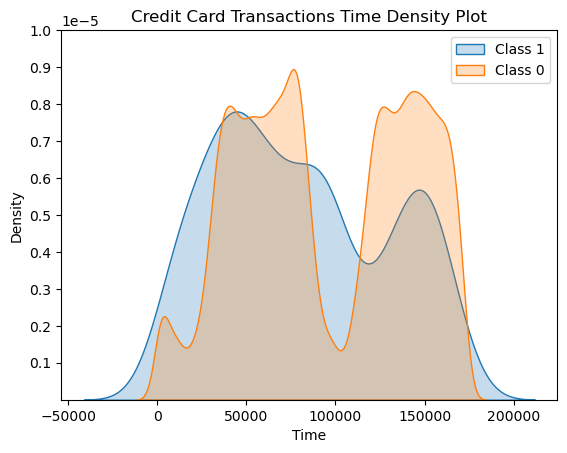

In [22]:
sns.kdeplot(data=class_1,fill=True,label='Class 1')
sns.kdeplot(data=class_0,fill=True,label='Class 0')
plt.title("Credit Card Transactions Time Density Plot")
yticks = [1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00]

scaled_yticks = [y * 0.000001 for y in yticks]
plt.yticks(scaled_yticks)
plt.legend()
plt.show()

In [23]:
data_df['Hour'] = np.floor(data_df['Time']/3600)

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


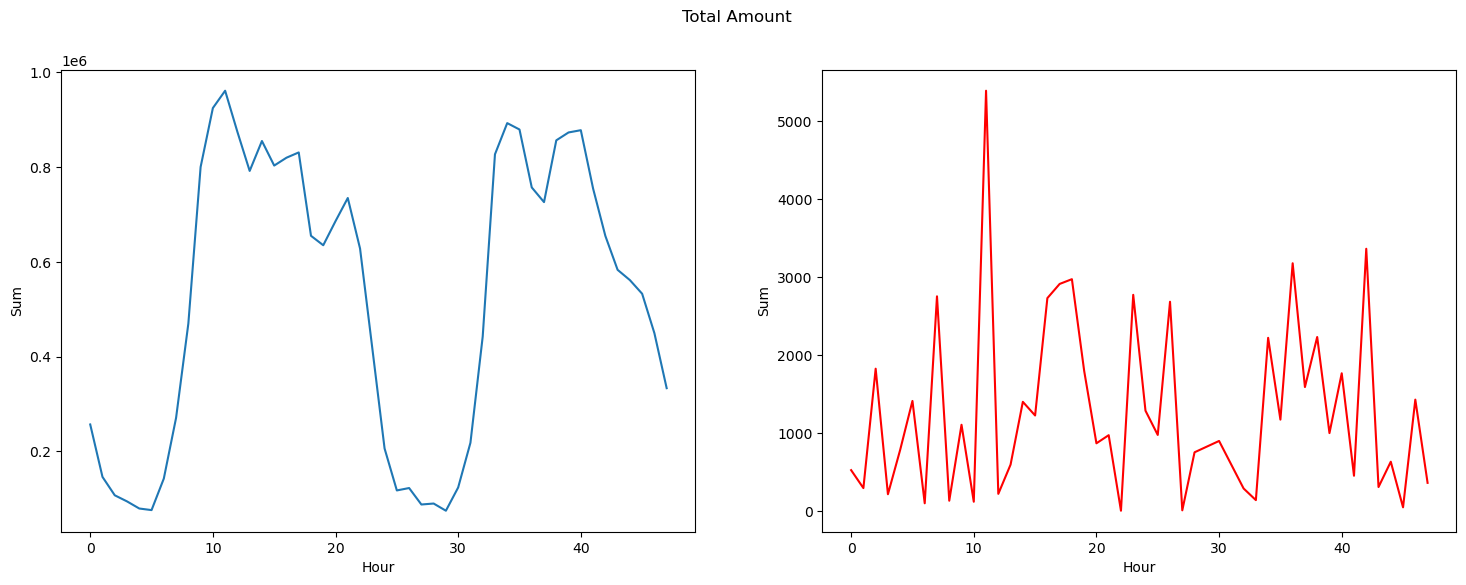

In [24]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

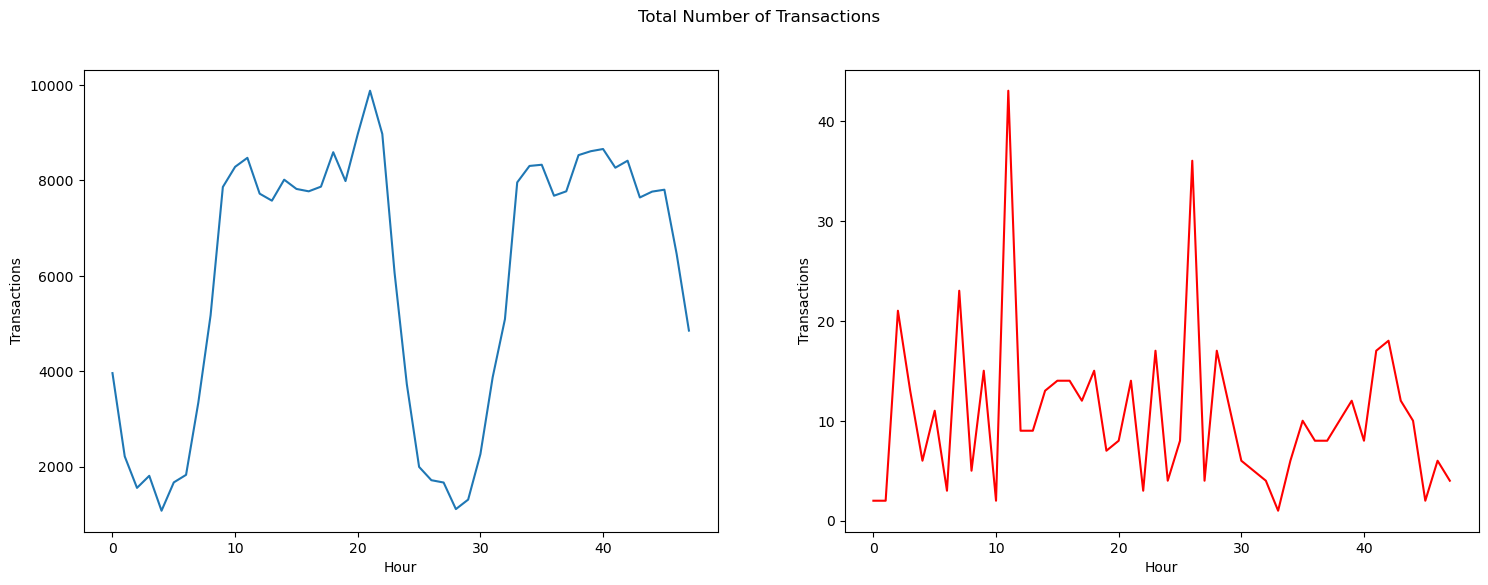

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

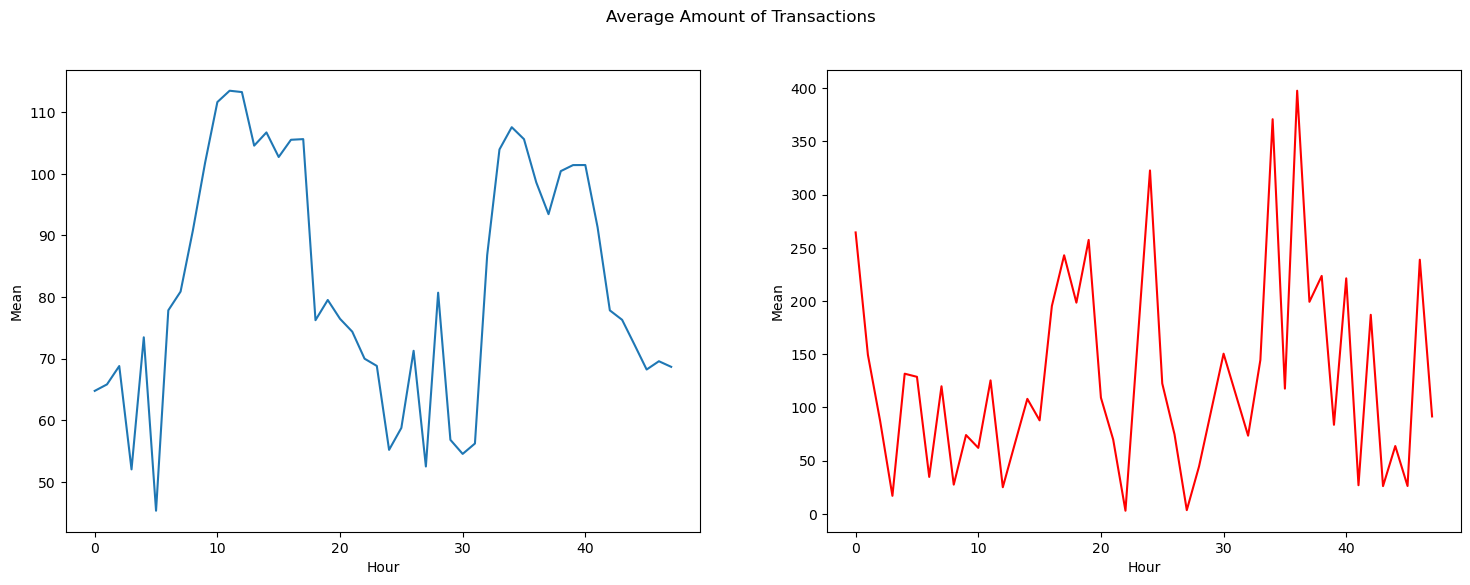

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

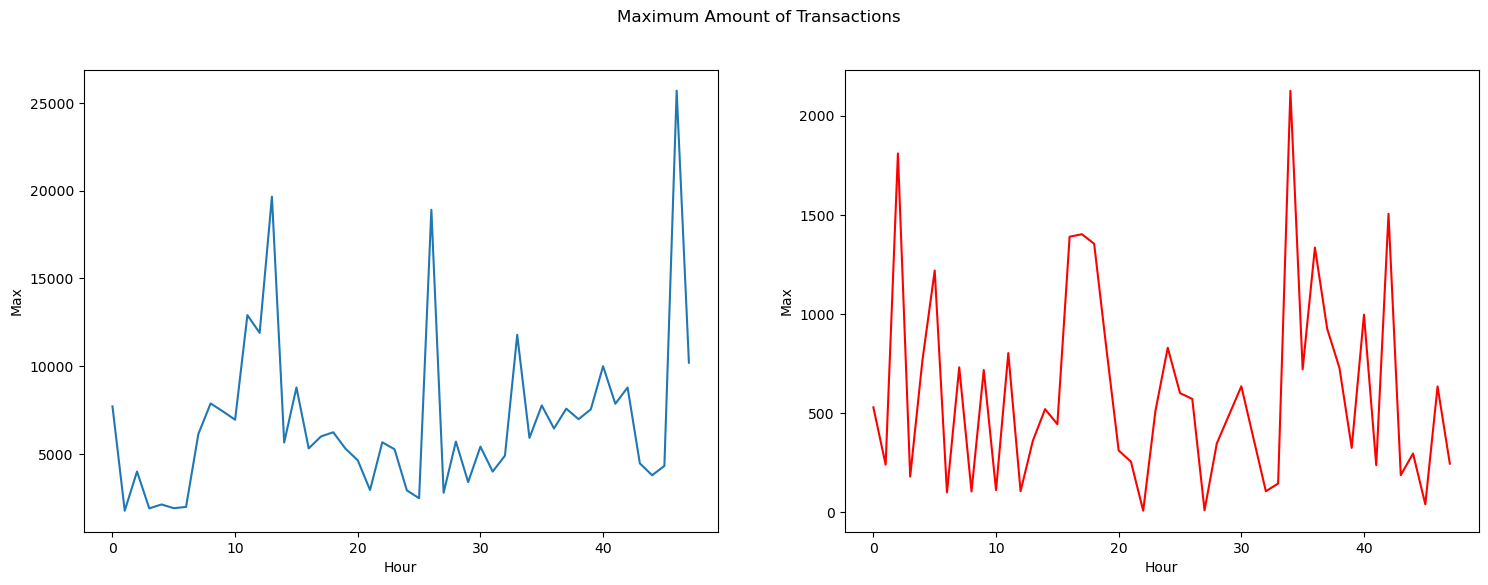

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

Text(0.5, 1.0, 'Class 1 - Minimum And Median Amount of Transactions')

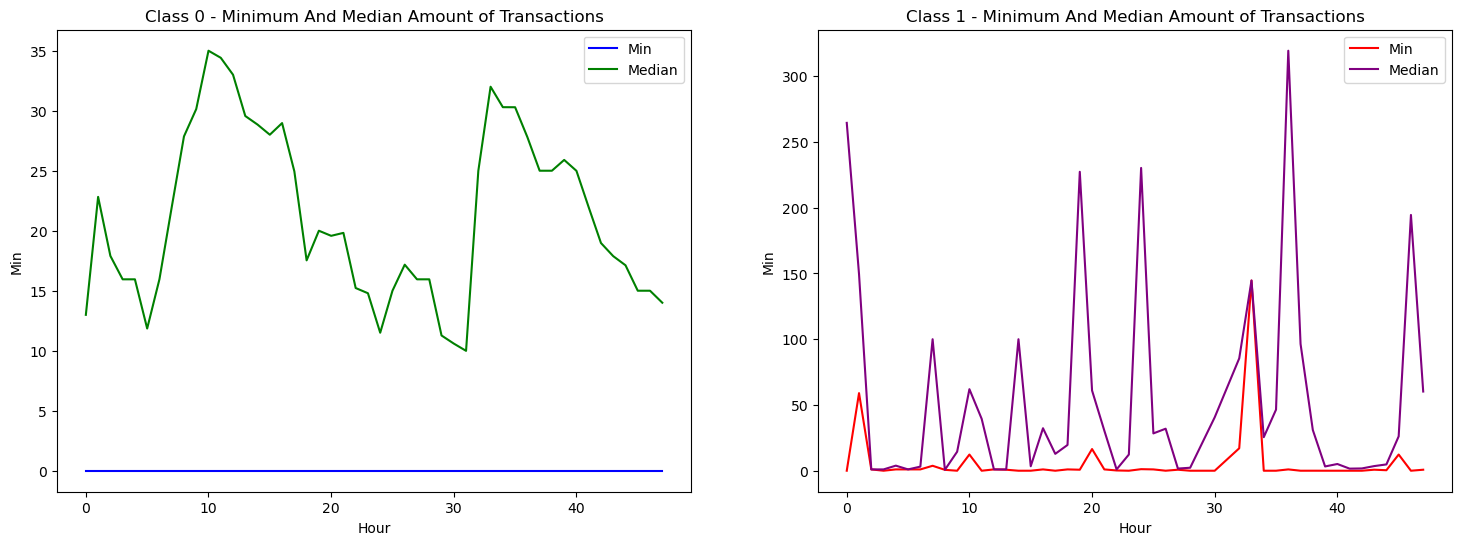

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.lineplot(x="Hour", y="Min", data=df[df['Class'] == 0], ax=ax1, label='Min', color='blue')
sns.lineplot(x="Hour", y="Median", data=df[df['Class'] == 0], ax=ax1, label='Median', color='green')
ax1.set_title('Class 0 - Minimum And Median Amount of Transactions')

sns.lineplot(x="Hour", y="Min", data=df[df['Class'] == 1], ax=ax2, label='Min', color='red')
sns.lineplot(x="Hour", y="Median", data=df[df['Class'] == 1], ax=ax2, label='Median', color='purple')
ax2.set_title('Class 1 - Minimum And Median Amount of Transactions')

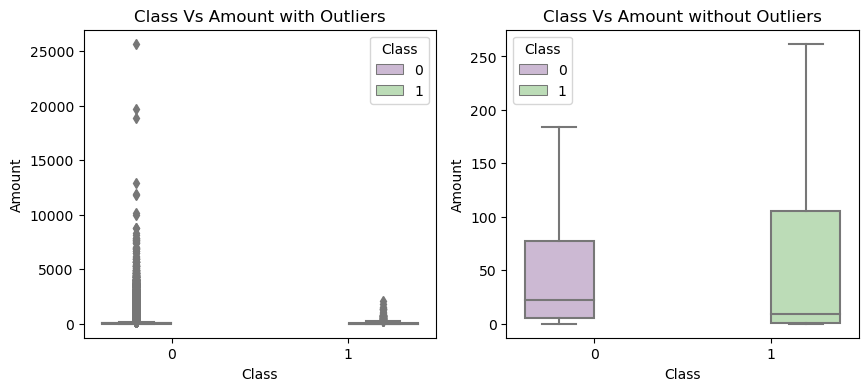

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
ax1.set_title('Class Vs Amount with Outliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
ax2.set_title('Class Vs Amount without Outliers')
plt.show();

In [30]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp[tmp.Class==0]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
class_1 = tmp[tmp.Class==1]['Amount']
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
cls1=data_df[['Class','Time','Amount']]
cls1=cls1[cls1.Class==1]
cls1.drop(columns='Class', inplace=True)
cls1.reset_index(inplace=True)
cls1.drop(columns='index', inplace=True)
cls1

,Time,Amount
0,406.0,0.00
1,472.0,529.00
2,4462.0,239.93
3,6986.0,59.00
4,7519.0,1.00
...,...,...
487,169142.0,390.00
488,169347.0,0.76
489,169351.0,77.89
490,169966.0,245.00


In [33]:
cls1.iplot(kind='scatter', x='Time', y='Amount', mode='markers', title='Amount of fraudulent transactions',\
          xTitle='Time', yTitle='Amount',layout_update={'width': 900, 'height': 500})


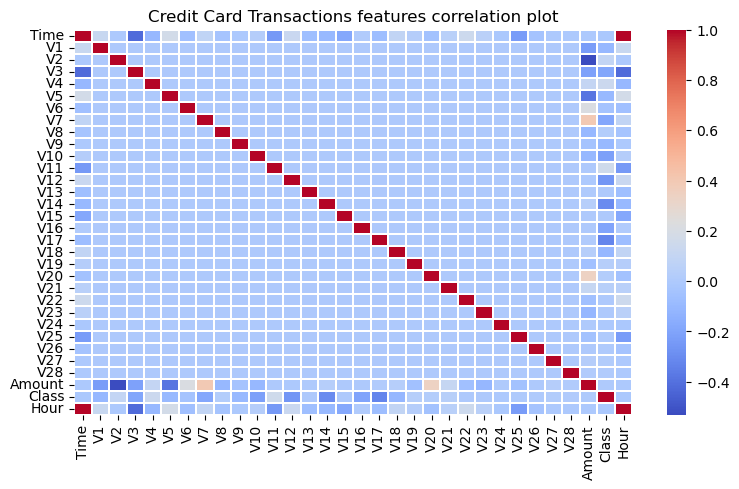

In [34]:
plt.figure(figsize = (9,5))
plt.title('Credit Card Transactions features correlation plot')
corr = data_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="coolwarm")
plt.show()

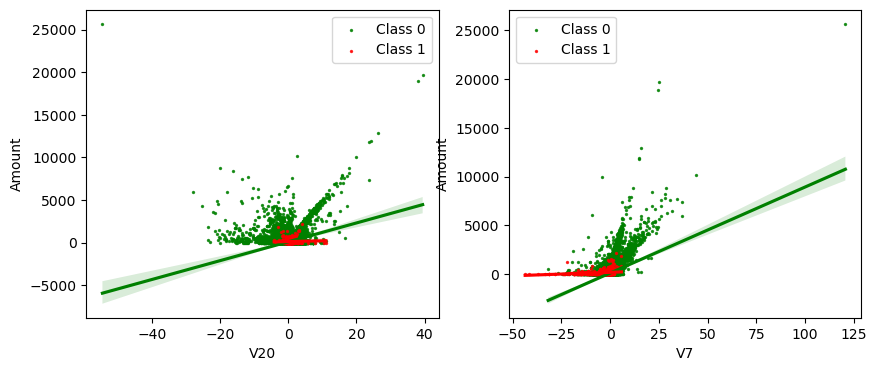

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
sns.regplot(ax=ax1, x='V20', y='Amount',label='Class 0',color='green', data=data_df[data_df.Class==0], scatter_kws={'s': 2})
sns.regplot(ax=ax1, x='V20', y='Amount',label='Class 1',color='red', data=data_df[data_df.Class==1], scatter_kws={'s': 2})
sns.regplot(ax=ax2, x='V7', y='Amount',label='Class 0',color='green', data=data_df[data_df.Class==0], scatter_kws={'s': 2})
sns.regplot(ax=ax2, x='V7', y='Amount',label='Class 1',color='red', data=data_df[data_df.Class==1], scatter_kws={'s': 2})
ax1.legend()
ax2.legend()
plt.show()

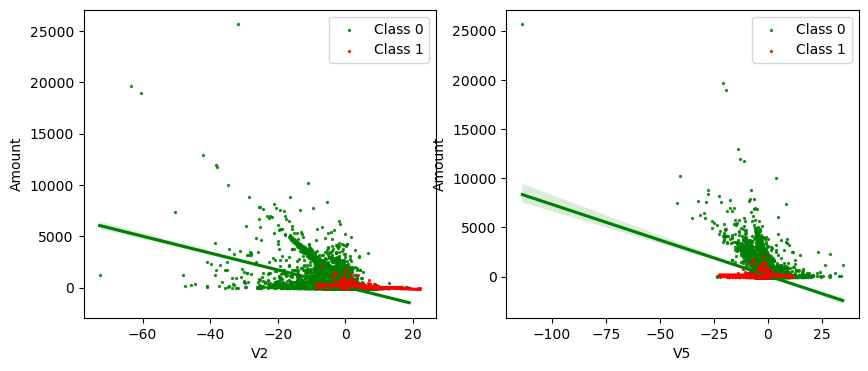

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
sns.regplot(ax=ax1, x='V2', y='Amount',label='Class 0',color='green', data=data_df[data_df.Class==0], scatter_kws={'s': 2})
sns.regplot(ax=ax1, x='V2', y='Amount',label='Class 1',color='red', data=data_df[data_df.Class==1], scatter_kws={'s': 2})
sns.regplot(ax=ax2, x='V5', y='Amount',label='Class 0',color='green', data=data_df[data_df.Class==0], scatter_kws={'s': 2})
sns.regplot(ax=ax2, x='V5', y='Amount',label='Class 1',color='red', data=data_df[data_df.Class==1], scatter_kws={'s': 2})
ax1.legend()
ax2.legend()
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_45904\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\ankit\AppData\Local\Temp\ipykernel_45904\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\ankit\AppData\Local\Temp\ipykernel_45904\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\ankit\AppData\Local\Temp\ipykernel_45904\955923673.py:15: UserWarning:



The `bw` parameter i

<Figure size 640x480 with 0 Axes>

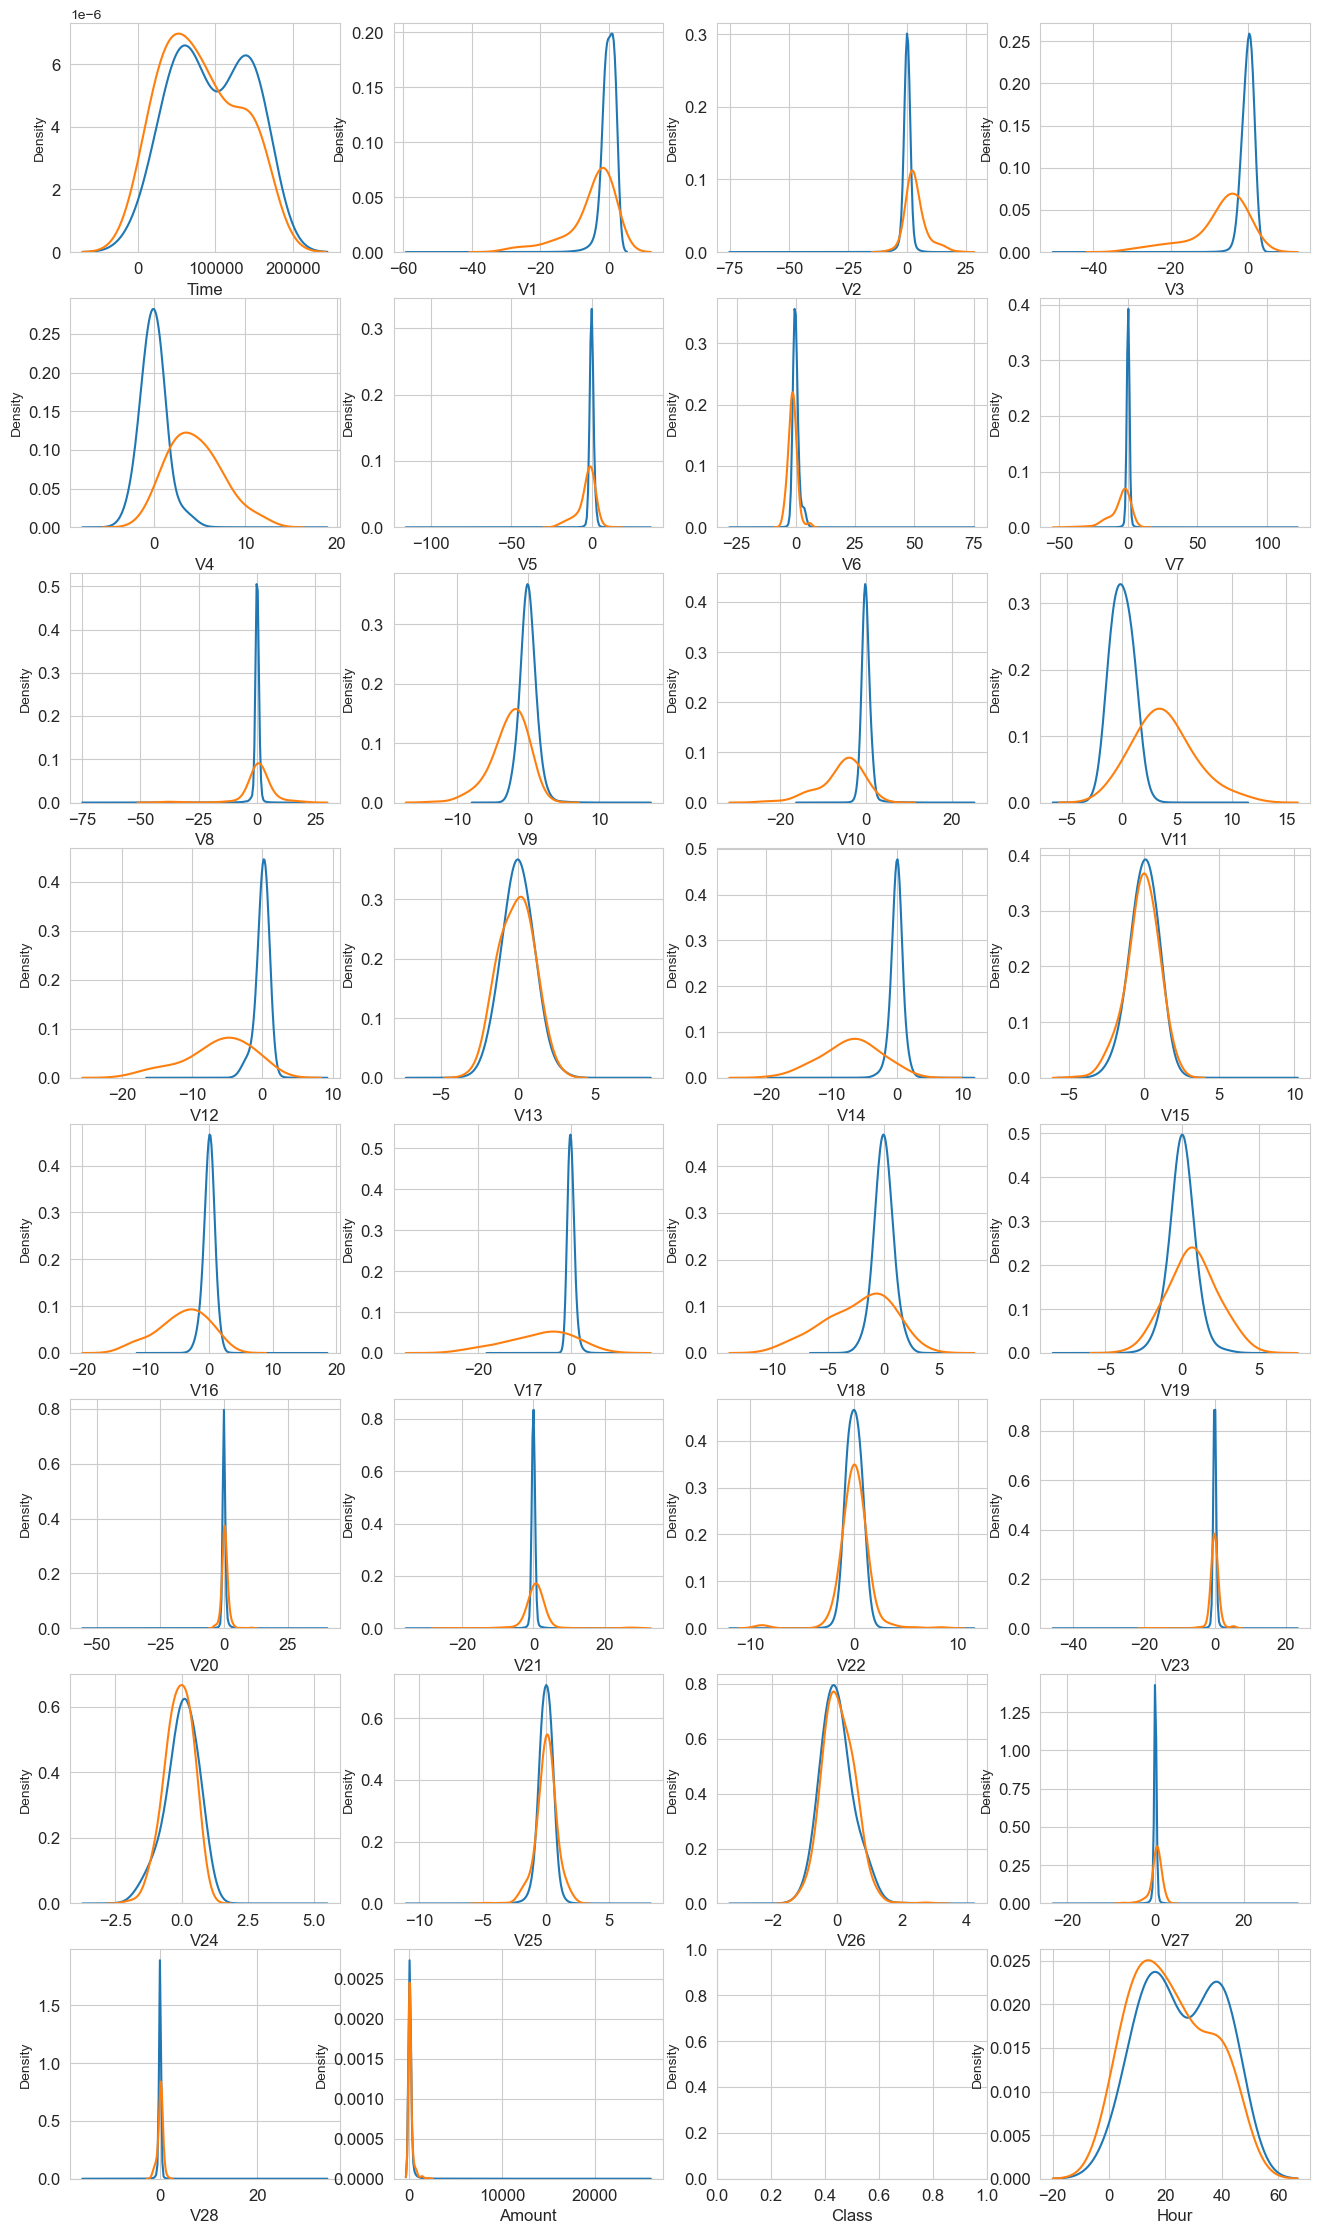

In [37]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [38]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [39]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

# Model

In [40]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)


In [41]:
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])

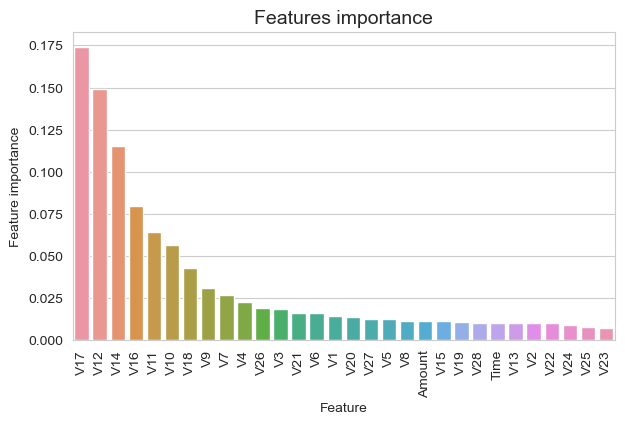

In [42]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

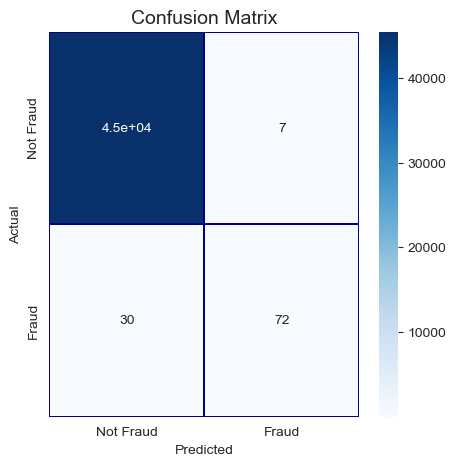

In [43]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [44]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091

# SVM

In [45]:
X = train_df[predictors], 
y = train_df[target]
print(X[0].head(2))
print(y.head(2))

            Time        V1        V2        V3        V4        V5        V6  \
46038    42612.0 -0.489771  0.319345  2.053837  0.729095  0.116019  1.800484   
257265  158079.0 -0.545212  0.491961  1.224502 -0.347668  0.211771  0.332727   

              V7        V8        V9       V10       V11       V12       V13  \
46038   0.665996  0.010833  0.963039 -0.069473 -0.186374  0.687982 -0.653740   
257265  0.397083  0.194546  0.538196 -1.601399 -1.337658 -0.091801  0.091831   

             V14       V15       V16       V17       V18       V19       V20  \
46038  -1.143153 -2.422838 -0.923921  0.007147 -0.439378  0.945815 -0.096093   
257265 -2.008998 -1.074204  0.177374  0.741228  0.543248 -0.134010  0.098790   

             V21       V22       V23       V24       V25       V26       V27  \
46038  -0.452395 -0.573578 -0.246387 -0.848802 -0.011584 -0.591272 -0.423901   
257265  0.131239  0.578832 -0.460271  0.577854  0.976243  0.873924 -0.083675   

            V28  Amount  
46038  -0.

In [46]:
X[0].shape
y.shape
print(X[0].shape)
print(y.shape)

(182276, 30)
(182276,)


In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = train_df[predictors], 
y = train_df[target]

X_train, X_test, y_train, y_test = train_test_split(X[0], y, test_size=0.2, random_state=42)

#SVM classifier with default parameters
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9983267500548606
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36395
           1       0.00      0.00      0.00        61

    accuracy                           1.00     36456
   macro avg       0.50      0.50      0.50     36456
weighted avg       1.00      1.00      1.00     36456



C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Neural Network

In [48]:
X_train=train_df[predictors]

In [49]:
Y_train=train_df[target]

In [50]:
X_test=valid_df[predictors]

In [51]:
Y_test=valid_df[target]

In [52]:
X_train.shape

(182276, 30)

In [53]:
X_test.shape

(45569, 30)

In [54]:
Y_train.shape

(182276,)

In [55]:
Y_test.shape

(45569,)

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError
model = Sequential()
model.add(LSTM(100, input_shape=(30, 1), return_sequences=True))  # Add more LSTM layers with increased units
model.add(Dropout(0.2))  # Add dropout layer to prevent overfitting
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=1024)  # Increase the number of epochs for training


loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

C:\Users\ankit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 381ms/step - accuracy: 0.9860 - loss: 0.0379
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 378ms/step - accuracy: 0.9984 - loss: 0.0016
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 355ms/step - accuracy: 0.9984 - loss: 0.0016
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 370ms/step - accuracy: 0.9984 - loss: 0.0016
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 387ms/step - accuracy: 0.9983 - loss: 0.0017
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 365ms/step - accuracy: 0.9983 - loss: 0.0017
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 386ms/step - accuracy: 0.9983 - loss: 0.0017
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 359ms/step - accuracy: 0.9984 - loss: 0.0014
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 369ms/step - accuracy: 0.9993 - loss: 5.7208e-04
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 361ms/step - accuracy: 0.9995 - loss: 4.5791e-04
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9991 - loss: 7.8457e-04
Test loss: 0.00100

In [57]:
m_train= Y_train.shape
m_test= Y_test.shape
print(m_train,"--",m_test)

(182276,) -- (45569,)


In [58]:
X_train.shape[1]

30

In [59]:
data_df.shape

(284807, 32)

In [60]:
dataset=data_df

# PyTorch

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class Model(nn.Module):
    def __init__(self, in_features=30, h1=8,h2=9,out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2= nn.Linear(h1,h2)
        self.out =nn.Linear(h2, out_features)
        
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [63]:
torch.manual_seed(41)
model= Model()

In [64]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [65]:
# df = pd.read_csv("D:\Data's\creditcard.csv")
df = pd.read_csv("E:\ASU\Sem 2\SML\project\creditcard.csv")

In [66]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [67]:
X = df.drop('Class',axis=1)
y = df["Class"]

In [68]:
X= X.values
y=y.values

In [69]:
 from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=41)

In [71]:
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)

In [72]:
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [73]:
criterion = nn.CrossEntropyLoss()

optimizer =torch.optim.Adam(model.parameters(), lr=0.1)


In [74]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=30, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=2, bias=True)
)>

In [75]:
epochs= 100
losses =[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    
    loss= criterion(y_pred,y_train)
    
    losses.append(loss.detach().numpy())
    #if i<10:
     #   print(f'Epoch: {i} and loss: {loss}')
    if i% 10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.7108793258666992
Epoch: 10 and loss: 1.0190664529800415
Epoch: 20 and loss: 0.20052358508110046
Epoch: 30 and loss: 0.08001726865768433
Epoch: 40 and loss: 0.042196765542030334
Epoch: 50 and loss: 0.029329542070627213
Epoch: 60 and loss: 0.023914728313684464
Epoch: 70 and loss: 0.02118820883333683
Epoch: 80 and loss: 0.019451474770903587
Epoch: 90 and loss: 0.018229832872748375


Text(0.5, 0, 'Epoch')

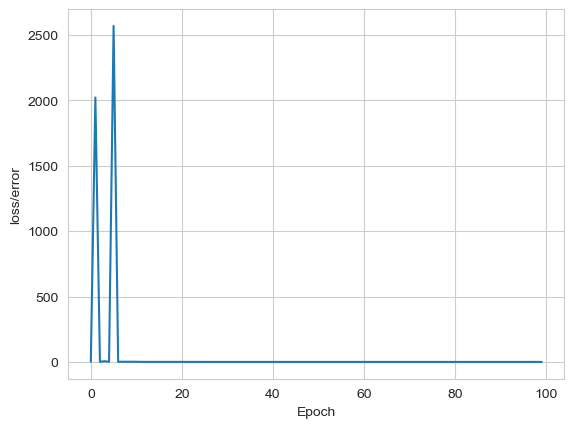

In [76]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [77]:
with torch.no_grad():
    y_eval =model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [78]:
loss

tensor(0.0169)

In [79]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val= model.forward(data)
        #if y_test[i]==0:
           # x="Not Fraud"
       # elif y_test[i]==1:
           # x="Fraud"
        #print(f'{i+1}.){str(y_val)}\t{y_test[i]}')
        
        if y_val.argmax().item()== y_test[i]:
            correct+=1

print(f'We got {correct} correct!')
print(f'Accuracy: {100 * correct / len(y_test)}%')           

We got 56868 correct!
Accuracy: 99.83497770443454%


In [80]:
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == y_test).sum().item()
    print(f'Accuracy: {100 * correct / len(y_test)}%')

Accuracy: 99.83497770443454%
